# Task #1: Concave Utility Function

Write a python program to create a concave utility function in wealth for arbitrary values of risk aversion. An investor has initial wealth of 1000 Euros. An investment offers the following prospects on future wealth: Future wealth has a 50% chance of ending at 1 Euro and a 50% chance at ending at 999,999.00 Euros. Highlight in red the utility in the high marginal utility state and in green the utility in the low marginal utility state. 

Plot two utility functions into one graph. Explain the graph in economically meaningful terms. 

 
Hint: A convenient way to characterize a utility function for illustrative purpose is

\begin{align*}
U(W_T) &= \frac{W^{1-\gamma}_T - 1}{1-\gamma}, \; \gamma \geq 0, \gamma \neq 1 \\\\
U(W_T) &= ln (W_T), \; \gamma = 1
\end{align*}

 
where $\gamma$ is the coefficient of relative risk aversion.


# Task #2: Convex Marginal Utility

Consider the setting from Task #1. Write a python program to compute marginal utility as a function of future wealth. Add a second plot to the output of Task #1 to show the respective marginal utility functions. Interpret the graph in economically meaningful terms.

In [1]:
#import some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative


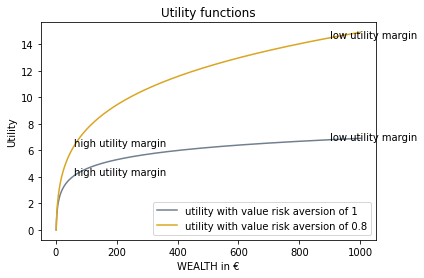

In [2]:
#Task1
def utility_function(wealth,risk_aversion_value):

    """This function creates the utility function"""

    if risk_aversion_value == 1 and risk_aversion_value >= 0:
        # math.log being the natural logarithm
        utility = math.log(wealth)
    elif risk_aversion_value != 1:
        utility = (wealth**(1-risk_aversion_value) - 1) / (1 - risk_aversion_value)
    else:
        print("unvalid value for the coefficient of relative risk")
        utility = 0

    return utility

# plotting
number_of_values = 1002
# empty Dataframe
df_for_plotting = pd.DataFrame()
# from 1- 1001: 1000 values
df_for_plotting["x"] = list(range(1,number_of_values))
df_for_plotting["y1"] = df_for_plotting["x"].map(lambda x : utility_function(x,1))
df_for_plotting["y2"] = df_for_plotting["x"].map(lambda x : utility_function(x,0.8))
plt.plot(df_for_plotting["x"] ,df_for_plotting["y1"],label = f"utility with value risk aversion of 1",color ="slategray")
plt.plot(df_for_plotting["x"] ,df_for_plotting["y2"],label = f"utility with value risk aversion of 0.8",color = "goldenrod")

# annotations
x_annothigh = 60
x_annotlow = 900
plt.annotate(text = "high utility margin",xy= (x_annothigh,utility_function(x_annothigh,1)))
plt.annotate(text = "low utility margin",xy= (x_annotlow,utility_function(x_annotlow,1)))
plt.annotate(text = "high utility margin",xy= (x_annothigh,utility_function(x_annothigh,0.8)))
plt.annotate(text = "low utility margin",xy= (x_annotlow,utility_function(x_annotlow,0.8)))
# style
plt.legend()
plt.title("Utility functions")
plt.xlabel("WEALTH in €")
plt.ylabel("Utility")
plt.show()

# Explanation of task 1:
self explaining

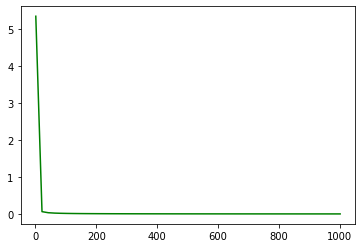

In [3]:
def helperfunc(x):
    return utility_function(x,0.9)
#Task2
# plot the derivation of the utiliy function
def deriv(wealth):
    """This function calculates the derivative"""
    return derivative(helperfunc,wealth)

# defininf x-axis intervals
x = np.linspace(1, number_of_values)

# plotting the function
# plt.plot(x, helperfunc(x), color='purple', label='Function')

# plotting its derivative
plt.plot(x, deriv(x), color='green', label='Derivative')

plt.show()

# Explanation of task 2:
At the beginning, there is a high margin utiliy, and it decreases with future wealth:
If i got 1. Mio € and i recieve 1 additional €, my utulity wouldn't increase as much. In contrast from 1 € to 2 € i doubled my wealth.